<a href="https://colab.research.google.com/github/Mohammednihal7/Machine-learning-ML-/blob/main/Netflix_stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# improting the file through the googlecolab
from google.colab import files
data = files.upload()

Saving synthetic_personal_finance_dataset.csv to synthetic_personal_finance_dataset.csv


In [92]:
import pandas as pd
df=pd.read_csv('Download Data - STOCK_US_XNAS_NFLX (1).csv')
display(df.head())

,Date,Open,High,Low,Close,Volume
0,07-07-2025,"1,295.00","1,295.00","1,276.02","1,289.62","22,73,737"
1,07-03-2025,"1,292.00","1,302.26","1,279.76","1,297.18","20,06,224"
2,07-02-2025,"1,296.96","1,299.95","1,271.59","1,284.86","30,48,801"
3,07-01-2025,"1,338.23","1,338.77","1,282.22","1,293.60","49,93,567"
4,06/30/2025,"1,331.00","1,341.15","1,321.21","1,339.13","32,82,908"


In [93]:
df.shape

(250, 6)

In [94]:
#finding the missing value
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [95]:
#finding the data type of the colume
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    250 non-null    object
 1   Open    250 non-null    object
 2   High    250 non-null    object
 3   Low     250 non-null    object
 4   Close   250 non-null    object
 5   Volume  250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [96]:
# 1. Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')



In [97]:
# 2. Remove commas from 'Volume' and convert to integer
df['Volume'] = df['Volume'].astype(str).str.replace(',', '').astype(int)


In [98]:
# 3. Remove commas and convert price columns to float
for col in ['Open', 'High', 'Low', 'Close']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    99 non-null     datetime64[ns]
 1   Open    250 non-null    float64       
 2   High    250 non-null    float64       
 3   Low     250 non-null    float64       
 4   Close   250 non-null    float64       
 5   Volume  250 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [100]:
df

,Date,Open,High,Low,Close,Volume
0,2025-07-07,1295.00,1295.00,1276.02,1289.62,2273737
1,2025-03-07,1292.00,1302.26,1279.76,1297.18,2006224
2,2025-02-07,1296.96,1299.95,1271.59,1284.86,3048801
3,2025-01-07,1338.23,1338.77,1282.22,1293.60,4993567
4,NaT,1331.00,1341.15,1321.21,1339.13,3282908
...,...,...,...,...,...,...
245,2024-12-07,652.75,655.92,643.71,647.60,3355197
246,2024-11-07,672.49,672.49,647.44,652.75,5111928
247,2024-10-07,685.02,687.22,673.16,677.65,2651928
248,2024-09-07,690.00,695.27,684.72,685.74,2599474


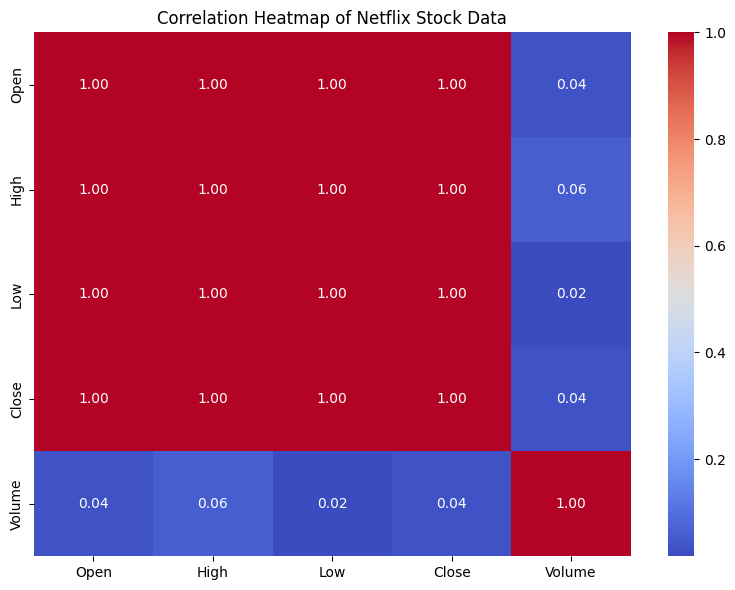

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use the existing DataFrame 'df'
# Data cleaning steps for Date, Volume, Open, High, Low, Close are already done in previous cells.

# Sort by Date (this might be redundant if already sorted, but harmless)
df = df.sort_values('Date')

# Compute correlation matrix
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Netflix Stock Data')
plt.tight_layout()
plt.show()

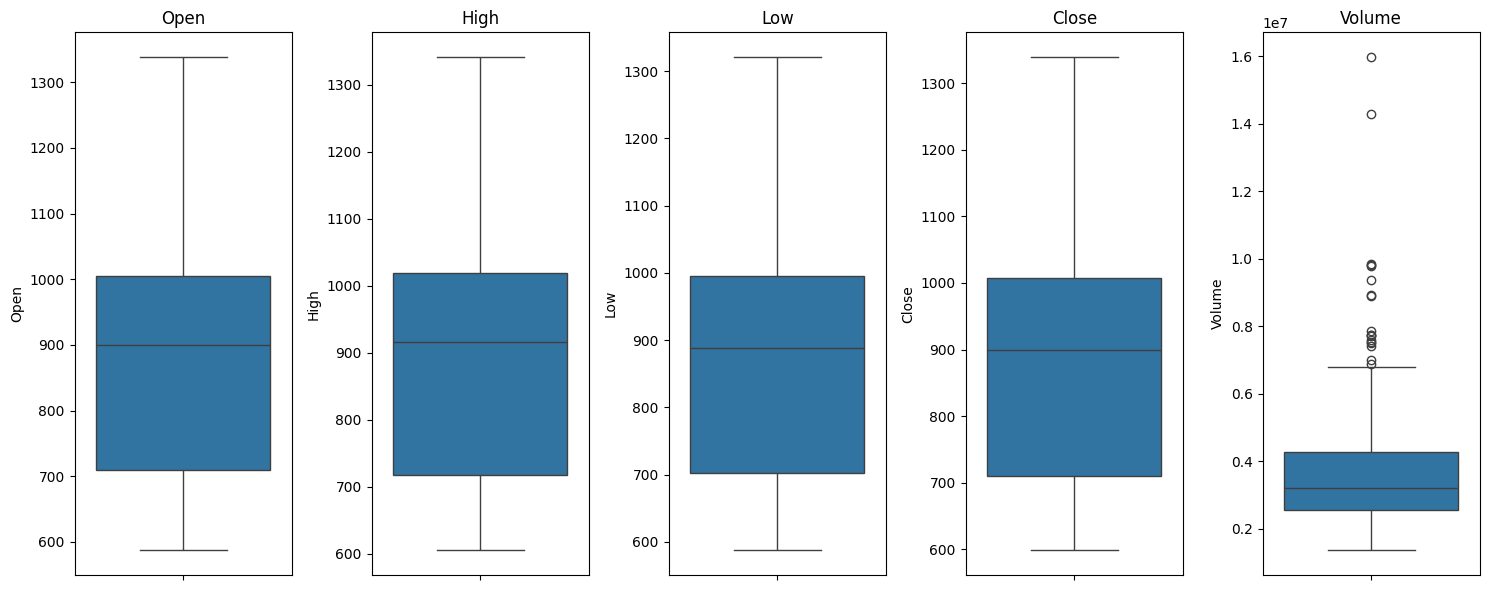

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(15, 6))

# Loop through each numeric column and plot a boxplot
numeric_cols = ['Open', 'High', 'Low', 'Close',"Volume"]

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [107]:
def detect_outliers_iqr_all(df, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        outlier_summary[col] = {
            "count": outliers.shape[0],
            "rows": outliers[['Date', col]]
        }

    return outlier_summary

# Apply it to your data
outliers_dict = detect_outliers_iqr_all(df, numeric_cols)

# Print summary
for feature, result in outliers_dict.items():
    print(f"\nFeature: {feature}")
    print(f"Outliers found: {result['count']}")
    print(result['rows'].head())  # Show top 5 outlier rows



Feature: Open
Outliers found: 0
Empty DataFrame
Columns: [Date, Open]
Index: []

Feature: High
Outliers found: 0
Empty DataFrame
Columns: [Date, High]
Index: []

Feature: Low
Outliers found: 0
Empty DataFrame
Columns: [Date, Low]
Index: []

Feature: Close
Outliers found: 0
Empty DataFrame
Columns: [Date, Close]
Index: []

Feature: Volume
Outliers found: 18
         Date   Volume
83 2025-06-03  7852559
82 2025-07-03  7737488
59 2025-09-04  7497974
81 2025-10-03  6995309
80 2025-11-03  7398934


In [108]:
df_cleaned = df.copy()

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

print(f"Dataset size after removing all outliers: {df_cleaned.shape}")


Dataset size after removing all outliers: (232, 6)


In [109]:
df

,Date,Open,High,Low,Close,Volume
231,2024-01-08,629.25,646.71,617.61,624.85,3720573
189,2024-01-10,713.64,717.76,698.59,706.13,2813482
166,2024-01-11,753.48,763.80,747.77,756.10,2996829
230,2024-02-08,620.98,625.27,608.35,613.64,3523003
188,2024-02-10,706.13,716.21,704.69,711.09,1758167
...,...,...,...,...,...,...
240,NaT,660.64,678.97,629.12,633.34,9815631
241,NaT,656.60,657.04,639.17,643.04,7575763
242,NaT,650.00,650.45,639.47,647.46,4017277
243,NaT,661.80,663.68,649.13,656.32,2685706


In [110]:
df_cleaned

,Date,Open,High,Low,Close,Volume
231,2024-01-08,629.25,646.71,617.61,624.85,3720573
189,2024-01-10,713.64,717.76,698.59,706.13,2813482
166,2024-01-11,753.48,763.80,747.77,756.10,2996829
230,2024-02-08,620.98,625.27,608.35,613.64,3523003
188,2024-02-10,706.13,716.21,704.69,711.09,1758167
...,...,...,...,...,...,...
238,NaT,647.50,649.91,641.00,642.76,2463579
239,NaT,639.50,656.29,632.60,647.50,5219077
242,NaT,650.00,650.45,639.47,647.46,4017277
243,NaT,661.80,663.68,649.13,656.32,2685706


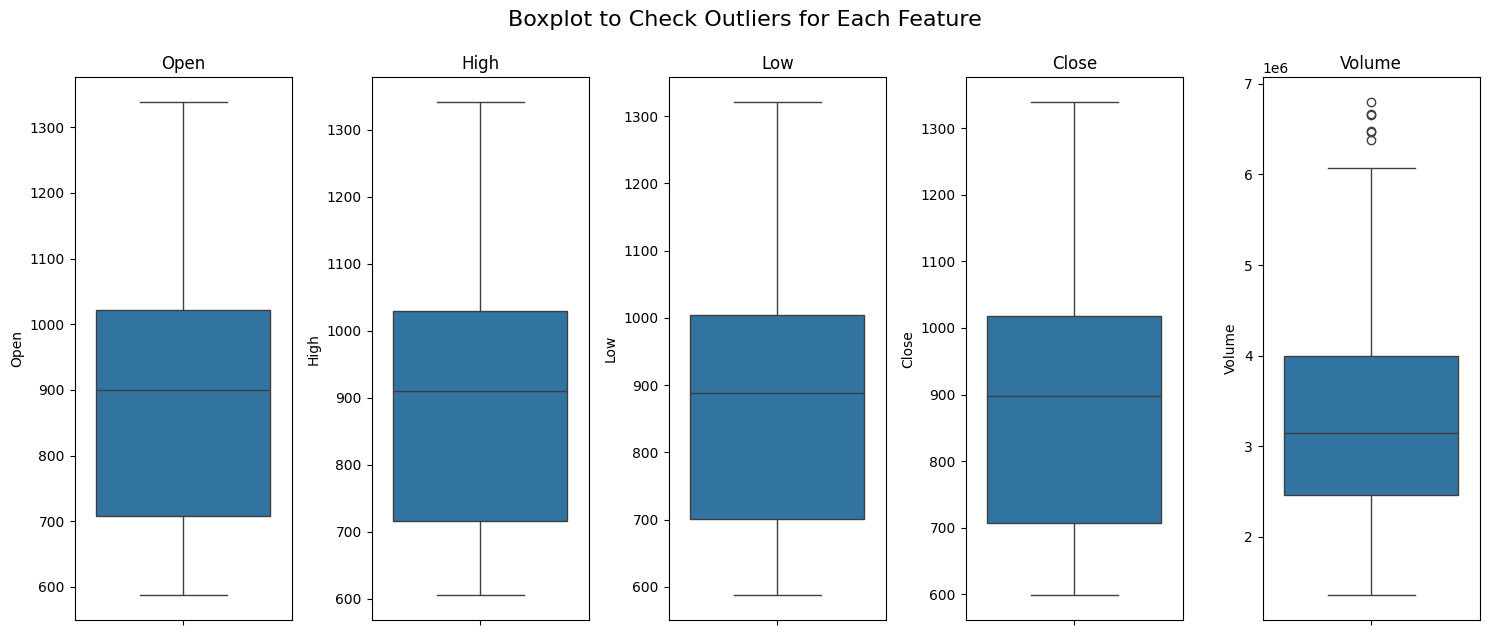

In [112]:
# Define your numeric features
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Set up boxplots
plt.figure(figsize=(15, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Boxplot to Check Outliers for Each Feature', fontsize=16, y=1.05)
plt.show()


In [113]:
def detect_outliers_iqr_all(df_cleaned, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

        outlier_summary[col] = {
            "count": outliers.shape[0],
            "rows": outliers[['Date', col]]
        }

    return outlier_summary

# Apply it to your data
outliers_dict = detect_outliers_iqr_all(df_cleaned, numeric_cols)

# Print summary
for feature, result in outliers_dict.items():
    print(f"\nFeature: {feature}")
    print(f"Outliers found: {result['count']}")
    print(result['rows'].head())  # Show top 5 outlier rows




Feature: Open
Outliers found: 0
Empty DataFrame
Columns: [Date, Open]
Index: []

Feature: High
Outliers found: 0
Empty DataFrame
Columns: [Date, High]
Index: []

Feature: Low
Outliers found: 0
Empty DataFrame
Columns: [Date, Low]
Index: []

Feature: Close
Outliers found: 0
Empty DataFrame
Columns: [Date, Close]
Index: []

Feature: Volume
Outliers found: 0
Empty DataFrame
Columns: [Date, Volume]
Index: []


In [114]:
df_cleaned

,Date,Open,High,Low,Close,Volume
231,2024-01-08,629.25,646.71,617.61,624.85,3720573
189,2024-01-10,713.64,717.76,698.59,706.13,2813482
166,2024-01-11,753.48,763.80,747.77,756.10,2996829
230,2024-02-08,620.98,625.27,608.35,613.64,3523003
188,2024-02-10,706.13,716.21,704.69,711.09,1758167
...,...,...,...,...,...,...
238,NaT,647.50,649.91,641.00,642.76,2463579
239,NaT,639.50,656.29,632.60,647.50,5219077
242,NaT,650.00,650.45,639.47,647.46,4017277
243,NaT,661.80,663.68,649.13,656.32,2685706


In [115]:
df_cleaned["Date"].value_counts()

,count
Date,
2024-01-08,1
2024-01-10,1
2024-01-11,1
2024-02-08,1
2024-02-10,1
...,...
2025-11-04,1
2025-11-06,1
2025-12-02,1


In [116]:
#LinearRegression algoritham

# Features and Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_all_pred = lr.predict(X)  # prediction on entire dataset

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
overall_r2 = r2_score(y, y_all_pred)  # total model accuracy
mse = mean_squared_error(y_test, y_test_pred)

# Output
print("Linear Regression:")
print("Training R² (Accuracy):", round(train_r2 * 100, 2), "%")
print("Testing R² (Accuracy):", round(test_r2 * 100, 2), "%")
print("Overall Model Accuracy (Total R²):", round(overall_r2 * 100, 2), "%")
print("Test Mean Squared Error (MSE):", round(mse, 2))


Linear Regression:
Training R² (Accuracy): 99.87 %
Testing R² (Accuracy): 98.5 %
Overall Model Accuracy (Total R²): 99.89 %
Test Mean Squared Error (MSE): 23.21


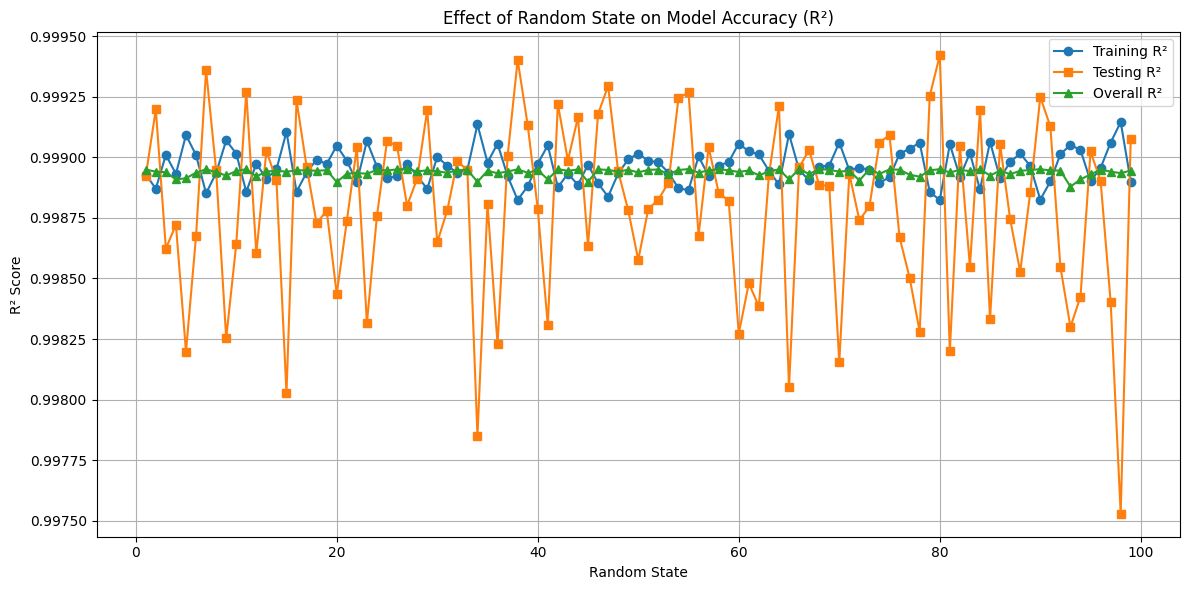

In [117]:
# Store results
random_states = range(1, 100)
train_scores = []
test_scores = []
overall_scores = []

# Loop through random states
for rs in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs, shuffle=True)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_all_pred = model.predict(X)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    overall_r2 = r2_score(y, y_all_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)
    overall_scores.append(overall_r2)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(random_states, train_scores, label='Training R²', marker='o')
plt.plot(random_states, test_scores, label='Testing R²', marker='s')
plt.plot(random_states, overall_scores, label='Overall R²', marker='^')

plt.title('Effect of Random State on Model Accuracy (R²)')
plt.xlabel('Random State')
plt.ylabel('R² Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [121]:
# Predict from user input
print("\nEnter stock values to predict 'Close' price:")
open_price = float(input("Enter Open price: "))
high_price = float(input("Enter High price: "))
low_price = float(input("Enter Low price: "))
volume = int(input("Enter Volume: "))

# Create a single row DataFrame for prediction
input_data = pd.DataFrame([[open_price, high_price, low_price, volume]],
                          columns=['Open', 'High', 'Low', 'Volume'])

predicted_close = lr.predict(input_data)[0]
print(f"\n Predicted Close Price: {round(predicted_close, 2)}")



Enter stock values to predict 'Close' price:
Enter Open price: 843.20
Enter High price: 844.89	
Enter Low price: 823.52	
Enter Volume: 3037650

 Predicted Close Price: 829.73


In [119]:
X_test.head()

,Open,High,Low,Volume
118,843.20,844.89,823.52,3037650
214,687.26,690.59,681.64,1354154
216,691.00,701.50,686.24,2729389
160,795.90,806.82,795.57,2399150
49,1048.00,1101.00,1047.02,6381896


In [120]:
y_test.head()

,Close
118,828.40
214,688.44
216,688.96
160,805.44
49,1096.87
